<a href="https://colab.research.google.com/github/coolphotography/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load a CSV file as a pandas dataframe
Telecom_churn_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone project/Telecom Churn.csv')

In [5]:
#Checking the columns
Telecom_churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
#displaying the first five rows.
Telecom_churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
#displaying the last five rows.
Telecom_churn_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


**1.** **Looking for and handling NaN/Null/Missing Data.**

In [8]:
Telecom_churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**INFERENCE**: The given dataset file is a clean file with no NaN.

In [9]:
Telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**INFERENCE:** From .info() we shall notice that every column has 3333 non-null homogeneous entry.

**2. DATA CLEANING**: Though the dataset provided to us does not contain Nan, the column names still need cleaning up, for example, "Voice mail plan" should be called "Voice\_mail\_plan", i.e., all the columns with white spaces between the words should be replaced with underscores(\_).

In [13]:
# Defining function for replacing the white spaces with underscores.
def get_underscore_for_space_list(list_of_strings):
  for string_ in range(len(list_of_strings)):
    list_of_strings[string_] = '_'.join(list_of_strings[string_].split())
  return list_of_strings

In [14]:
# Calling 'get_underscore_for_space_list'.
Telecom_churn_df.columns = get_underscore_for_space_list(list(Telecom_churn_df.columns))

In [15]:
Telecom_churn_df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

**3. ANALYSING THE DATA.**

3.1. The correlation of various parameters is visualized in a heat map.

Text(0.5, 1.0, 'Correlation across various parameters')

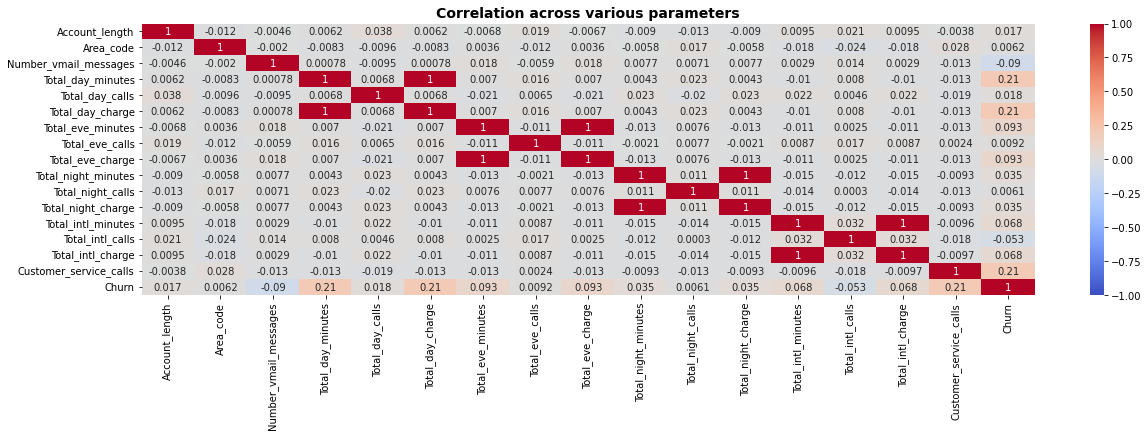

In [33]:
#corr_df consists of correlation value between various numerical columns.
corr_df = Telecom_churn_df[['Account_length', 'Area_code', 'Number_vmail_messages','Total_day_minutes', 'Total_day_calls', 
                            'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge','Total_night_minutes', 
                            'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge',
                            'Customer_service_calls', 'Churn']].corr()
#plotting the heatmap.
plt.figure(figsize=(20,5))
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)
plt.title('Correlation across various parameters', fontsize = 14, fontweight ='bold')

**REASONING:** I believe the best way to understand the numerical columns is by correlating the data and plotting a heatmap.

**INFERENCE:** There are many columns that are uncorrelated, which can be understandable through intuition, however, the important correlation should be noticed between the column "Churn" and various columns "Total/_day/_minutes", "Total/_day/_charge", "Total/_evening/_minutes", "Total/_evening/_charge", "Total/_intl/_minutes", and "Customer/_service/_calls", since correlation is significant. Further analysis of these columns will be done using various visualization tools.

3.2. Stacked bar graph demonstrating relation between non-numerical data sets and churn rate.

In [18]:
# Calculating churn rate for 'Area Code', 'International Plan', 'Voice mail plan', 'Customer service calls'.
Churn_rate_area_code = Telecom_churn_df.groupby("Area_code")["Churn"].mean().reset_index()
Churn_rate_international_plan = Telecom_churn_df.groupby("International_plan")["Churn"].mean().reset_index()
Churn_rate_voice_plan = Telecom_churn_df.groupby("Voice_mail_plan")["Churn"].mean().reset_index()
Churn_rate_customer_service_call = Telecom_churn_df.groupby("Customer_service_calls")["Churn"].mean().reset_index()

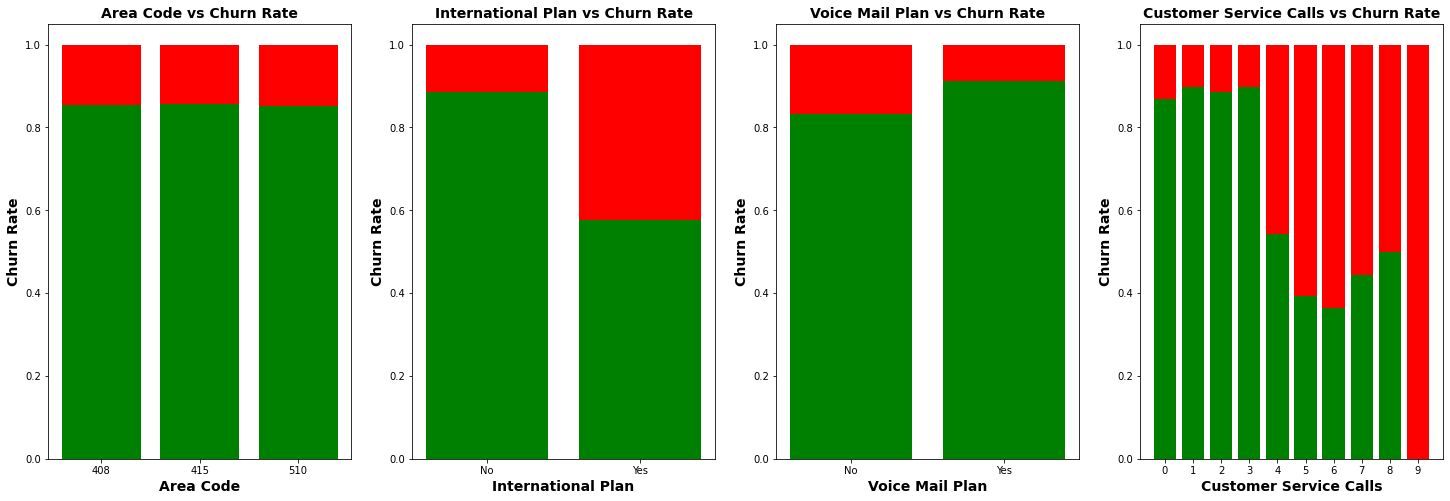

In [32]:
# Using sub-plot to get a consolidated visual.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25, 8)) # 1- row, 4- columns.

# subplot-1 for the area code.
ax1.bar(Churn_rate_area_code['Area_code'].apply(lambda x: str(x)), (1-Churn_rate_area_code['Churn']), color = 'g')
ax1.bar(Churn_rate_area_code['Area_code'].apply(lambda x: str(x)), Churn_rate_area_code['Churn'], 
        bottom = (1 - Churn_rate_area_code['Churn']), color = 'r')
ax1.set_xlabel('Area Code', fontsize = 14, fontweight ='bold')
ax1.set_ylabel('Churn Rate', fontsize = 14, fontweight ='bold')
ax1.set_title('Area Code vs Churn Rate', fontsize = 14, fontweight ='bold')

ax2.bar(Churn_rate_international_plan['International_plan'], (1-Churn_rate_international_plan['Churn']), color = 'g')
ax2.bar(Churn_rate_international_plan['International_plan'], Churn_rate_international_plan['Churn'], 
        bottom = (1 - Churn_rate_international_plan['Churn']), color = 'r')
ax2.set_xlabel('International Plan', fontsize = 14, fontweight ='bold')
ax2.set_ylabel('Churn Rate', fontsize = 14, fontweight ='bold')
ax2.set_title('International Plan vs Churn Rate', fontsize = 14, fontweight ='bold')

ax3.bar(Churn_rate_voice_plan['Voice_mail_plan'], (1-Churn_rate_voice_plan['Churn']), color = 'g')
ax3.bar(Churn_rate_voice_plan['Voice_mail_plan'], Churn_rate_voice_plan['Churn'], 
        bottom = (1 - Churn_rate_voice_plan['Churn']), color = 'r')
ax3.set_xlabel('Voice Mail Plan', fontsize = 14, fontweight ='bold')
ax3.set_ylabel('Churn Rate', fontsize = 14, fontweight ='bold')
ax3.set_title('Voice Mail Plan vs Churn Rate', fontsize = 14, fontweight ='bold')

ax4.bar(Churn_rate_customer_service_call['Customer_service_calls'], (1-Churn_rate_customer_service_call['Churn']), color = 'g')
ax4.bar(Churn_rate_customer_service_call['Customer_service_calls'], Churn_rate_customer_service_call['Churn'], 
        bottom = (1 - Churn_rate_customer_service_call['Churn']), color = 'r')
ax4.set_xlabel('Customer Service Calls', fontsize = 14, fontweight ='bold')
ax4.set_ylabel('Churn Rate', fontsize = 14, fontweight ='bold')
ax4.set_title('Customer Service Calls vs Churn Rate', fontsize = 14, fontweight ='bold')
ax4.set_xticks(Churn_rate_customer_service_call['Customer_service_calls'])